## Using the GFF3 file that is well annotated, do:


#### W5-H17: Visualize the data as much as you can. How many genes/CDS/exon are listed for ENSEMBL and other datasets?


In [1]:
import pandas as pd
col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
df=pd.read_csv('./datasets/Homo_sapiens.GRCh38.85.gff3.gz', compression='gzip',
                         sep='\t', comment='#', low_memory=False,
                         header=None, names=col_names)

In [28]:
ens_df=df[df.source.isin(['ensembl'])]
ens_gene = ens_df[ens_df.type == 'gene']
ens_cds = ens_df[ens_df.type == 'CDS']
ens_exon = ens_df[ens_df.type == 'exon']
print('ensembl gene/CDS/exon counts\ngene: {}\nCDS: {}\nexon: {}'.format(len(ens_gene),len(ens_cds),len(ens_exon)))

ensembl gene/CDS/exon counts
gene: 333
CDS: 88200
exon: 104269


In [29]:
dot_df=df[df.source.isin(['.'])]
dot_gene = dot_df[dot_df.type == 'gene']
dot_cds = dot_df[dot_df.type == 'CDS']
dot_exon = dot_df[dot_df.type == 'exon']
print('. gene/CDS/exon counts\ngene: {}\nCDS: {}\nexon: {}'.format(len(dot_gene),len(dot_cds),len(dot_exon)))

. gene/CDS/exon counts
gene: 0
CDS: 0
exon: 0


In [39]:
dot_df.type.value_counts() #here I want to know what values in type with its count

biological_region    182510
Name: type, dtype: int64

In [40]:
enshv_df=df[df.source.isin(['ensembl_havana'])]
enshv_gene = enshv_df[enshv_df.type == 'gene']
enshv_cds = enshv_df[enshv_df.type == 'CDS']
enshv_exon = enshv_df[enshv_df.type == 'exon']
print('ensembl_havana gene/CDS/exon counts\ngene: {}\nCDS: {}\nexon: {}'.format(len(enshv_gene),len(enshv_cds),len(enshv_exon)))

ensembl_havana gene/CDS/exon counts
gene: 19064
CDS: 248313
exon: 268822


In [41]:
havana_df=df[df.source.isin(['havana'])]
havana_gene = havana_df[havana_df.type == 'gene']
havana_cds = havana_df[havana_df.type == 'CDS']
havana_exon = havana_df[havana_df.type == 'exon']
print('havana gene/CDS/exon counts\ngene: {}\nCDS: {}\nexon: {}'.format(len(havana_gene),len(havana_cds),len(havana_exon)))

havana gene/CDS/exon counts
gene: 23073
CDS: 368091
exon: 807505


#### W5-H18: Plot a histogram of length information for a) entire genome, 2) for each source, i.e., ENSEMBL, Havana, etc. separately (can use subplot)

<AxesSubplot:title={'center':'Entired Genome Length from ensembl'}, ylabel='Frequency'>

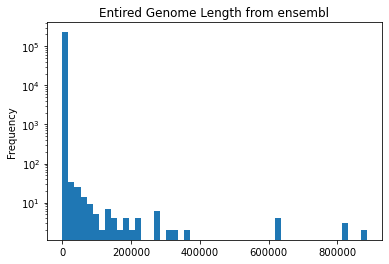

In [54]:
ens_cp = ens_df.copy()
ens_cp['length'] = ens_cp.end - ens_cp.start + 1
ens_cp.length.plot(kind='hist', bins=50, logy=True, title='Entired Genome Length from ensembl')

<AxesSubplot:title={'center':'Entired Genome Length from havana'}, ylabel='Frequency'>

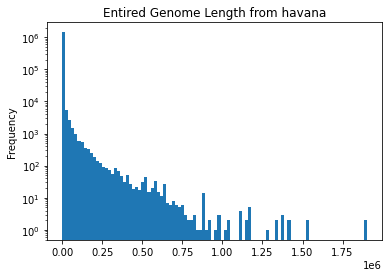

In [53]:
havana_cp = havana_df.copy()
havana_cp['length'] = havana_cp.end - havana_cp.start + 1
havana_cp.length.plot(kind='hist', bins=100, logy=True, title='Entired Genome Length from havana')

<AxesSubplot:title={'center':'Entired Genome Length from ensembl_havana'}, ylabel='Frequency'>

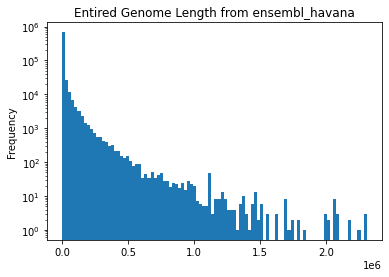

In [52]:
enshv_cp = enshv_df.copy()
enshv_cp['length'] = enshv_cp.end - enshv_cp.start + 1
enshv_cp.length.plot(kind='hist', bins=100, logy=True, title='Entired Genome Length from ensembl_havana')

<AxesSubplot:title={'center':'Entired Genome Length from .'}, ylabel='Frequency'>

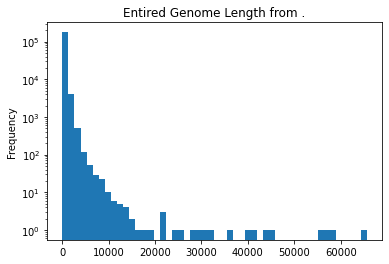

In [51]:
dot_cp = dot_df.copy()
dot_cp['length'] = dot_cp.end - dot_cp.start + 1
dot_cp.length.plot(kind='hist', bins=50, logy=True, title='Entired Genome Length from .')

#### W5-H19: Parse the description column: Anything you can visualize? Visualize at least one thing.

In [59]:
import re

ds = re.compile(r'description=(?P<description>.+?);')

def extract_gene_desc(attributes_str):
    res = ds.search(attributes_str)
    if res is None:
        return ''
    else:
        return res.group('description')

ens_cp['description'] = ens_cp.attributes.apply(extract_gene_desc)

In [71]:
ens_cp.sample(10)

,seqid,source,type,start,end,score,strand,phase,attributes,length,description
1862356,3,ensembl,exon,197069219,197069260,.,-,.,Parent=transcript:ENST00000357674;Name=ENSE000...,42,
251568,10,ensembl,CDS,26777065,26777241,.,-,0,ID=CDS:ENSP00000439646;Parent=transcript:ENST0...,177,
2315637,7,ensembl,exon,151381878,151381981,.,-,.,Parent=transcript:ENST00000621812;Name=ENSE000...,104,
1114088,17,ensembl,five_prime_UTR,63872859,63872954,.,-,.,Parent=transcript:ENST00000613718,96,
2499479,9,ensembl,CDS,134817026,134817079,.,+,0,ID=CDS:ENSP00000481360;Parent=transcript:ENST0...,54,
2304972,7,ensembl,three_prime_UTR,141651525,141651609,.,+,.,Parent=transcript:ENST00000629555,85,
193345,1,ensembl,snRNA_gene,200008505,200008607,.,-,.,ID=gene:ENSG00000202491;Name=RNU6-716P;biotype...,103,RNA%2C U6 small nuclear 716%2C pseudogene [Sou...
131904,1,ensembl,five_prime_UTR,144456537,144456805,.,-,.,Parent=transcript:ENST00000581897,269,
2550618,X,ensembl,CDS,70610503,70610543,.,-,1,ID=CDS:ENSP00000340995;Parent=transcript:ENST0...,41,
82305,1,ensembl,CDS,51810281,51810404,.,-,0,ID=CDS:ENSP00000444416;Parent=transcript:ENST0...,124,


In [70]:
# From random sampling, I found that sequences belong to gene in the type column have the most of the descriptions
# So I decided to subclasses the dataframe by gene in the type column
new_cp = ens_cp[ens_cp.type == 'gene']
new_cp.sample(10).description.values

array(['',
       'Serine/threonine-protein phosphatase 6 regulatory ankyrin repeat subunit B  [Source:UniProtKB/Swiss-Prot%3BAcc:Q8N8A2]',
       'Small Cajal body specific RNA 15 [Source:RFAM%3BAcc:RF00426]',
       'Small Cajal body specific RNA 6 [Source:RFAM%3BAcc:RF00478]',
       'small Cajal body-specific RNA 17 [Source:RFAM%3BAcc:RF00492]',
       'ATP/GTP binding protein-like 1 [Source:HGNC Symbol%3BAcc:HGNC:26504]',
       '', '',
       'small Cajal body-specific RNA 17 [Source:RFAM%3BAcc:RF00492]', ''],
      dtype=object)

In [99]:
ob = new_cp.description.values
print(ob[3])
print(ob[3].split()[6])


Small Cajal body specific RNA 16 [Source:RFAM%3BAcc:RF00424]
[Source:RFAM%3BAcc:RF00424]


#### W5-H20: Based on our dataset, how many transcripts does a gene typically have? What percentage of genes have more than 1 transcript? Hint: You will need to sum up the exon lengths to get the transcripts. You can use external libraries. 

In [11]:
#To answer this question, I will use three major sources: havana, havana_ensembl, and ensembl.
gdf = df[df.source.isin(['havana', 'havana_ensembl', 'ensembl'])]
gf = gdf[gdf.type == 'gene']
gf['length'] = gf.end - gf.start + 1
       
         
edf = df[df.source.isin(['havana', 'havana_ensembl', 'ensembl'])]
ef = edf[edf.type == 'exon']
ef['length'] = ef.end - ef.start + 1

average_exon_in_gene = gf.length.sum() / ef.length.sum()
average_exon_in_gene
print('Avereage numbers of exon in a gene is {}'.format(average_exon_in_gene))

/var/folders/f3/_x3kzk0s34b_t_960n_ltxvw0000gn/T/ipykernel_842/2531260482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gf['length'] = gf.end - gf.start + 1


Avereage numbers of exon in a gene is 1.1753119763979434


/var/folders/f3/_x3kzk0s34b_t_960n_ltxvw0000gn/T/ipykernel_842/2531260482.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ef['length'] = ef.end - ef.start + 1


In [20]:
ef.length.describe()

count    911774.000000
mean        236.386482
std         543.597444
min           1.000000
25%          86.000000
50%         128.000000
75%         199.000000
max      205012.000000
Name: length, dtype: float64

In [25]:
#I filter out the genes that have length less than doubled mean length of exon.
gf[gf.length > 472].sort_values('length').iloc[::-1]

,seqid,source,type,start,end,score,strand,phase,attributes,length
1466328,2,havana,gene,140231423,142131701,.,-,.,ID=gene:ENSG00000168702;Name=LRP1B;biotype=pro...,1900279
1726954,3,havana,gene,28349178,29767537,.,+,.,ID=gene:ENSG00000283563;Name=RP11-9J18.1;bioty...,1418360
1839600,3,havana,gene,174438573,175810552,.,+,.,ID=gene:ENSG00000177694;Name=NAALADL2;biotype=...,1371980
2529106,X,havana,gene,37349330,38687674,.,+,.,ID=gene:ENSG00000250349;Name=RP5-972B16.2;biot...,1338345
978149,16,havana,gene,82626803,83800640,.,+,.,ID=gene:ENSG00000140945;Name=CDH13;biotype=pro...,1173838
...,...,...,...,...,...,...,...,...,...,...
2524689,X,havana,gene,21421822,21422294,.,-,.,ID=gene:ENSG00000231913;Name=RARRES2P3;biotype...,473
1465835,2,havana,gene,136329441,136329913,.,-,.,ID=gene:ENSG00000230037;Name=UBBP1;biotype=pro...,473
1633851,21,havana,gene,39127568,39128040,.,+,.,ID=gene:ENSG00000228861;Name=RPL23AP12;biotype...,473
1177199,18,havana,gene,35257040,35257512,.,+,.,ID=gene:ENSG00000279989;Name=RP11-158H5.2;biot...,473


In [24]:
#Here I divide numbers of genes that have more than doubled mean length of exon by total numbers of genes
17915/len(gf)

0.7654020336665812

### DISCUSSION<br>

Transcripts are composed of 5'- and 3'- Untranslated regions (UTR) and exons. Here I did not include the length of UTR; however, a gene contains, at least, one or more exons in the theory. When I googled it, average is 3.42 transcripts per gene.  I have the average number of 1.175 which are much smaller, and this number can be smaller if I have counted UTR regions.  One possible explanation is that genes in the three sources are lack of isoforms. At last, the percentage of a gene contain more than one transcripts is 76.54%.

Resources to check out
1. https://daler.github.io/gffutils/
2. http://seqanswers.com/forums/showthread.php?t=4914

See also

   #### [The GFF spec can be found here](https://www.sanger.ac.uk/resources/software/gff/spec.html)
   #### [A great explanation on the GFF format can be found here](http://gmod.org/wiki/GFF3)